In [77]:
import sys
import os
import pandas as pd
import numpy as np
import pymc

sys.path.append(f'{os.path.dirname(os.path.dirname(os.getcwd()))}/draft_pick_prob')

In [78]:
draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_draft_order.csv')


mock_draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_EP_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_EP_22'})
mock_draft_df_2=pd.read_csv('2022_FC_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_FC_22'})
mock_draft_df_3=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_MH_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_MH_22'})
mock_draft_df_4=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_BM_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_BM_22'})
mock_draft_df_5=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_CB_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_CB_22'})
mock_draft_df_6=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_DH_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_DH_22'})
mock_draft_df_7=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_DP_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_DP_22'})
mock_draft_df_8=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_MP_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_MP_22'})
mock_draft_df_9=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_PA_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_PA_22'})
mock_draft_df_10=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_PL_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_PL_22'})
mock_draft_df_11=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_RS_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_RS_22'})
mock_draft_df_12=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_SN_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_SN_22'})
mock_draft_df_13=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_SS_final_rankings.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_SS_22'})
mock_draft_df_14=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_SW_md.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_SW_22'})
mock_draft_df_15=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_CP_md.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_CP_22'})
mock_draft_df_16=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_2CP_md.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_2CP_22'})
mock_draft_df_17=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_3CP_md.csv').sort_values(by='RANK').rename(columns={'RANK':'RANK_3CP_22'})

possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')

In [79]:
draft_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022_draft_order.csv')

file_list =['2022_EP_final_rankings.csv','2022_FC_final_rankings.csv','2022_MH_final_rankings.csv','2022_BM_final_rankings.csv','2022_CB_final_rankings.csv','2022_DH_final_rankings.csv','2022_DP_final_rankings.csv','2022_MP_final_rankings.csv','2022_PA_final_rankings.csv','2022_PL_final_rankings.csv','2022_RS_final_rankings.csv','2022_SN_final_rankings.csv','2022_SS_final_rankings.csv','2022_SW_md.csv','2022_CP_md.csv','2022_2CP_md.csv','2022_3CP_md.csv']

mock_draft_dfs = []

for filename in file_list:
    df = pd.read_csv(filename)  # Read the CSV file
    
    # Sort the DataFrame by 'RANK' column
    df = df.sort_values(by='RANK')
    
    # Check if 'RANK' increases by 1 each time
    is_consecutive = df['RANK'].diff() == 1
    
    # Use a mask to filter the DataFrame to keep only consecutive ranks
    df = df[is_consecutive]
    
    prefix = filename[5:7]
        
    # Rename the 'RANK' column based on the extracted prefix
    if filename[-6:-4]== 'md':
        df = df.rename(columns={'RANK': f'md_RANK_{prefix}_22'})
    else:
        df = df.rename(columns={'RANK': f'bb_RANK_{prefix}_22'})
    
    mock_draft_dfs.append(df)  # Add the processed DataFrame to the list



possible_players=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')


In [81]:
import math
df_player_rankings=possible_players[['PLAYER_ID']].merge(mock_draft_dfs[0][['PLAYER_ID','bb_RANK_EP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[1][['PLAYER_ID','bb_RANK_FC_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[2][['PLAYER_ID','bb_RANK_MH_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[3][['PLAYER_ID','bb_RANK_BM_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[4][['PLAYER_ID','bb_RANK_CB_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[5][['PLAYER_ID','bb_RANK_DH_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[6][['PLAYER_ID','bb_RANK_DP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[7][['PLAYER_ID','bb_RANK_MP_22']], how='left', on=['PLAYER_ID'])

df_player_rankings=df_player_rankings.merge(mock_draft_dfs[8][['PLAYER_ID','bb_RANK_PA_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[9][['PLAYER_ID','bb_RANK_PL_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[10][['PLAYER_ID','bb_RANK_RS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[11][['PLAYER_ID','bb_RANK_SN_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[12][['PLAYER_ID','bb_RANK_SS_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[13][['PLAYER_ID','md_RANK_SW_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[14][['PLAYER_ID','md_RANK_CP_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[15][['PLAYER_ID','md_RANK_2C_22']], how='left', on=['PLAYER_ID'])
df_player_rankings=df_player_rankings.merge(mock_draft_dfs[16][['PLAYER_ID','md_RANK_3C_22']], how='left', on=['PLAYER_ID'])

df_player_rankings

,PLAYER_ID,bb_RANK_EP_22,bb_RANK_FC_22,bb_RANK_MH_22,bb_RANK_BM_22,bb_RANK_CB_22,bb_RANK_DH_22,bb_RANK_DP_22,bb_RANK_MP_22,bb_RANK_PA_22,bb_RANK_PL_22,bb_RANK_RS_22,bb_RANK_SN_22,bb_RANK_SS_22,md_RANK_SW_22,md_RANK_CP_22,md_RANK_2C_22,md_RANK_3C_22
0,1,3.0,3.0,3.0,NaN,2.0,4.0,2.0,4.0,2.0,3.0,5.0,3.0,4.0,2.0,NaN,2.0,2.0
1,2,6.0,4.0,4.0,4.0,5.0,6.0,5.0,6.0,4.0,5.0,3.0,4.0,9.0,4.0,6.0,4.0,4.0
2,3,4.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
3,4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,5,11.0,6.0,13.0,5.0,7.0,11.0,9.0,21.0,5.0,19.0,7.0,7.0,18.0,6.0,5.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
def likelihood(strengths, rankings):
    # params: vector of parameters [intercept, slope]
    likelihood=1
    counter=1
    paired_lists = list(zip(strengths, rankings))
    sorted_pairs = sorted(paired_lists, key=lambda x: x[1])
    sorted_list1, sorted_list2 = zip(*sorted_pairs)
    while counter<len(sorted_list2)+1 and sorted_list2[counter]!=sorted_list2[counter+1]:
        # print(np.exp(sorted_list1[counter-1]))
        # print(np.sum(np.exp(sorted_list1[counter-1:])))
        # print(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        likelihood+=np.log(np.exp(sorted_list1[counter-1])/np.sum(np.exp(sorted_list1[counter-1:])))
        counter+=1
    return likelihood
'''
def neg_log_likelihood(params, df):
    neg_ll=1
    columns_to_go_through=df.columns[1:]
    for i in columns_to_go_through:
        max=df[i].max()+1
        player_rank=list(df[i])
        fixed_player_rank=[max if math.isnan(x) else x for x in player_rank]
        neg_ll-=likelihood(params, fixed_player_rank)
    return neg_ll
'''
def neg_log_likelihood(params, df):
    neg_ll = 1  # Initialize as 0 for correct accumulation
    columns_to_go_through = df.columns[1:]
    for i in columns_to_go_through:
        max_rank = df[i].max() + 1
        player_rank = list(df[i])
        fixed_player_rank = [max_rank if math.isnan(x) else x for x in player_rank]
        
        # Determine the weighting factor based on column name
        if i.startswith('bb'):
            weight = 1  # Example: 0.5 for less value
        elif i.startswith('md'):
            weight = 1.0  # Example: 1.0 (or more) for 'md' columns
        else:
            weight = 1.0  # Default weight for other columns

        # Apply the weighting factor
        neg_ll -= weight * likelihood(params, fixed_player_rank)

    return neg_ll


In [108]:
def constraint_eq(x):
    return sum(x)

In [115]:
import scipy.optimize

counter=40
l_play=[]
variable_bounds=[]
count=0

while count<len(df_player_rankings):
    l_play.append(counter)
    count+=1
    counter-=0.20
    variable_bounds.append((-40,40))

result = scipy.optimize.minimize(neg_log_likelihood, l_play, args=(df_player_rankings,), method='SLSQP', bounds=variable_bounds, constraints={'type': 'eq', 'fun': constraint_eq})
print(result.x)

[ 1.85315610e+01  2.22111256e+01  2.37542562e+01  1.38651500e+01
  2.06153605e+01  2.11666732e+01  1.99462224e+01  1.93574691e+01
  2.08030899e+01  1.99463764e+01  1.90211734e+01  1.88789219e+01
  1.99585355e+01  1.79861420e+01  2.05485294e+01  1.85133093e+01
  2.09069497e+01  1.69746287e+01  1.88825607e+01  1.84248555e+01
  1.77623160e+01  1.74190583e+01  1.79008307e+01  1.94327407e+01
  1.58400792e+01  1.69569697e+01  1.59437804e+01  1.84447105e+01
  1.59306602e+01  1.88740437e+01  1.81243437e+01  1.48301201e+01
  1.69692647e+01  1.43214104e+01  1.73888882e+01  1.43544009e+01
  1.67659172e+01  1.38109211e+01  2.43243582e+00  1.31847281e+01
  1.32835677e+01  1.55680983e+01  1.60008647e+01  1.64609835e+01
  1.64053486e+01  1.63915503e+01  2.59011790e+00  1.44207449e+01
  1.53787093e+01  2.71471186e+00  1.59294799e+01  2.81762378e+00
  1.68247136e+01  1.45670534e+01  1.53538689e+01  1.32409485e+01
  1.38515262e+01  2.96947216e+00  1.31177232e+01  1.60692162e+01
  1.62923370e+01  1.66009

In [116]:
player_ability_parameters_df=pd.read_csv('/Users/tiffanieli/Documents/EMSF_CAPSTONE/draft_pick_prob/model_validation/2022_validation/2022PLAYER_IDS.csv')
player_ability_parameters_df['ABILITY_PARAMS']=result.x
player_ability_parameters_df=player_ability_parameters_df.sort_values(by='ABILITY_PARAMS', ascending=False, axis=0)
player_ability_parameters_df['SIM_RANK'] = range(1, len(player_ability_parameters_df) + 1)
player_ability_parameters_df.head(10)

,PLAYER_NAME,PLAYER_ID,ABILITY_PARAMS,SIM_RANK
2,Logan Cooley,3,23.754256,1
1,Simon Nemec,2,22.211126,2
5,David Jiricek,6,21.166673,3
16,Joakim Kemell,17,20.906950,4
8,Matthew Savoie,9,20.803090,5
4,Cutter Gauthier,5,20.615360,6
14,Jonathan Lekkerimäki,15,20.548529,7
12,Frank Nazar,13,19.958535,8
9,Pavel Mintyukov,10,19.946376,9
6,Kevin Korchinski,7,19.946222,10


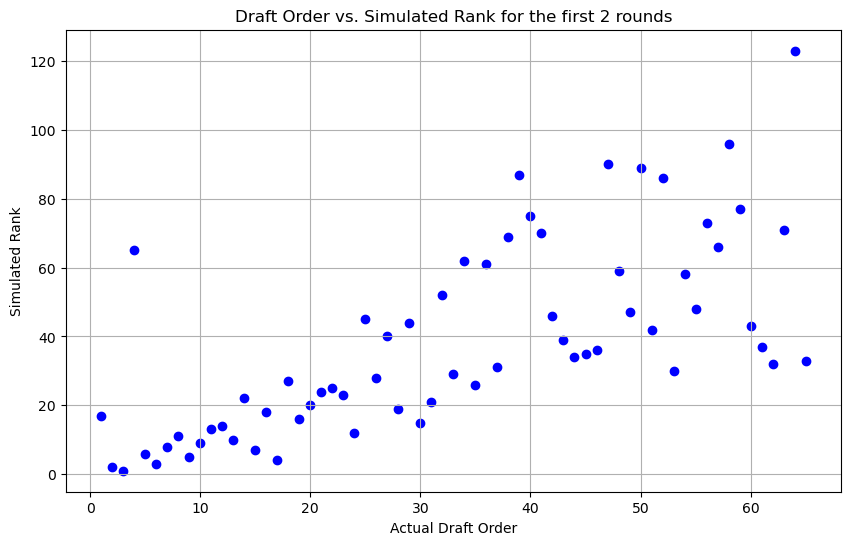

In [111]:
import matplotlib.pyplot as plt

# Assuming you have DataFrames: draft_df and player_ability_parameters_df

# Merge the two DataFrames on the 'PLAYER_NAME' column
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_ID', 'ORDER']], on='PLAYER_ID')
merged_df = merged_df.sort_values(by='ORDER')
merged_df
# Filter the data for the first 100 orders
merged_df_first_100 = merged_df.head(65)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_first_100['ORDER'], merged_df_first_100['SIM_RANK'], c='blue', label='Draft Order vs. Simulated Rank')
plt.xlabel('Actual Draft Order')
plt.ylabel('Simulated Rank')
plt.title('Draft Order vs. Simulated Rank for the first 2 rounds')
plt.grid(True)


plt.show()


In [117]:
#Error -Mean absolute error (MAE)
merged_df = player_ability_parameters_df.merge(draft_df[['PLAYER_NAME', 'ORDER']], on='PLAYER_NAME')
merged_df = merged_df.sort_values(by='ORDER')
merged_df = merged_df.head(32)
merged_df['ERROR'] = abs(merged_df['SIM_RANK']-merged_df['ORDER'])
mae = merged_df['ERROR'].sum()/len(merged_df['ERROR'])
print(mae)


#top 32
# (-40,40 bounds gives 6.875 mae with .2 for bb and 1 for md)
# (-40,40 bounds gives 7.81 mae with .5 for bb and 1 for md) 
# (-40,40 bounds gives 8.25 mae with .8 for bb and 1 for md) 
# (-40,40 bounds gives 8.66 mae with 1 for bb and 1 for md)

#top 62
# (-40,40 bounds gives 14.37 mae with .2 for bb and 1 for md)
# (-40,40 bounds gives 14.47 mae with .8 for bb and 1 for md)



8.65625
